<a href="https://colab.research.google.com/github/AndrewKorn/physics_nsu/blob/main/particle_in_finite_pit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Найти уровни энергии и построить соответствующие волновые функции в одномерной прямоугольной потенциальной яме шириной $a$ и глубиной $–U_0$**



##Уравнение Шредингера для областей внутри($Ι$) и снаружи($ΙΙ$) ямы

$\frac{ħ^2}{2m}𝛹^{''}_{Ι} + (E + U_0)𝛹_{Ι} = 0$ для $-\frac{a}{2} \leq x \leq \frac{a}{2}$

$\frac{ħ^2}{2m}𝛹^{''}_{ΙΙ} + E𝛹_{Ι
Ι} = 0$ для $|x| ≥ a$

Волновые функции могут быть либо симметричными либо антисимметричными в силу
симметрии потенциала. С учетом этого и непрерывности Ψ(x ) на границах ямы
получаются граничные условия, а из них уравнения на уровни энергии и вид симметричных
и антисимметричных решений. 


$k_1 = \sqrt{\frac{2m|E|}{ħ^2}}$

$k_2 = \sqrt{\frac{2m(E + U_0)}{ħ^2}}$

##Cимметричный случай


\begin{equation*}
𝛹(x) = 
 \begin{cases}
   A e^{k_1x} &\text{$x < -\frac{a}{2}$}\\
   B cos(k_2x) &\text{$x \in [-\frac{a}{2}; \frac{a}{2}]$} \\
   A e^{-k_1x} &\text{$x > \frac{a}{2}$}
 \end{cases}
\end{equation*}


Из непрерывности волновой функции и ее производной следуют следующие уровнения:

\begin{equation*}
 \begin{cases}
   A e^{-k_1 \frac{a}{2}} = B cos(k_2\frac{a}{2})
   \\
   k_1 A e^{-k_1 \frac{a}{2}} =k_2 B sin(k_2\frac{a}{2})
 \end{cases}
\end{equation*}

Получили систему двух линейных алгебраических уравнений относительно неизвестных
коэффициентов A, B. Система уравнений совместна, когда:

$tg(\frac{k_2a}{2}) = \frac{k_1}{k_2}$

или

$tg(\frac{\sqrt{2m(E+U_0)}a}{2ħ}) = \frac{\sqrt{|E|}}{\sqrt{E+U_0}}$

##Антисимметричный случай


\begin{equation*}
𝛹(x) = 
 \begin{cases}
   -A e^{k_1x} &\text{$x < -\frac{a}{2}$}\\
   B sin(k_2x) &\text{$x \in [-\frac{a}{2}; \frac{a}{2}]$} \\
   A e^{-k_1x} &\text{$x > \frac{a}{2}$}
 \end{cases}
\end{equation*}

Из непрерывности волновой функции и ее производной следуют следующие уровнения:

\begin{equation*}
 \begin{cases}
   A e^{-k_1 \frac{a}{2}} = B sin(k_2\frac{a}{2})
   \\
   -k_1 A e^{-k_1 \frac{a}{2}} =k_2 B cos(k_2\frac{a}{2})
 \end{cases}
\end{equation*}

Получили систему двух линейных алгебраических уравнений относительно неизвестных
коэффициентов A, B. Система уравнений совместна, когда:

$ctg(\frac{k_2a}{2}) = -\frac{k_1}{k_2}$

или

$ctg(\frac{\sqrt{2m(E+U_0)}a}{2ħ}) = -\frac{\sqrt{|E|}}{\sqrt{E+U_0}}$

##Решение уравнений

In [442]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as p

In [443]:
m = 1
U = 1
h = 1
a = 20

<module 'pylab' from '/usr/local/lib/python3.7/dist-packages/pylab.py'>

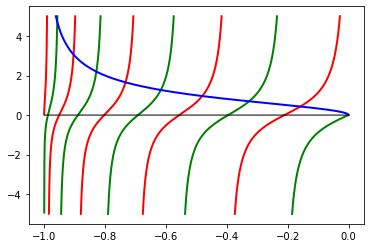

In [444]:
x = p.linspace(-U + 0.00001, 0, 100000)
tg = (p.sin(a * (2 * m * (x + U))**(1/2) / (2 * h))) / (p.cos(a * (2 * m * (x + U))**(1/2) / (2 * h)))
ctg = -(p.cos(a * (2 * m * (x + U))**(1/2) / (2 * h))) / (p.sin(a * (2 * m * (x + U))**(1/2) / (2 * h)))
right = (abs(x) / (U + x))**(1/2)
t = right - tg
ct = right - ctg
y0 = [0 for i in x]

tol = 5
tg[tg > tol] = np.nan
tg[tg < -tol] = np.nan
ctg[ctg > tol] = np.nan
ctg[ctg < -tol] = np.nan
right[right > tol] = np.nan
right[right < -tol] = np.nan
t[t > tol] = np.nan
t[t < -tol] = np.nan
ct[ct > tol] = np.nan
ct[ct < -tol] = np.nan

# q = np.linspace(-4, 4, 1000)
# k = 3
# b = [(math.pi * h * (1 +2 * k))**2 / (2 * m * a**2) - U for i in q]
# print((math.pi * h * (1 +2 * k))**2 / (2 * m * a**2) - U)

p.plot(x, tg, 'r-', lw=2)
p.plot(x, ctg, 'g-', lw=2)
p.plot(x, right, 'b-', lw=2)
#p.plot(x, t, 'y-', lw=3)
#p.plot(x,ct,'r-', lw=3)
p.plot(x, y0, color='black', lw=1)
p

In [445]:
angle_f = lambda x_: a * (2 * m * (x_ + U))**(1/2) / (2 * h)
tg_func = lambda x: (p.sin( angle_f(x) )) / (p.cos( angle_f(x) ))
ctg_func = lambda x: -(p.cos( angle_f(x) )) / (p.sin( angle_f(x) ))
right_func = lambda x: (abs(x) / (U + x))**(1/2)


In [446]:
from scipy import optimize

t = lambda x: right_func(x) - tg_func(x)

sol_t = []
max_k = 0
while (math.pi * h * (1 + 2 * max_k))**2 / (2 * m * a**2) - U < 0:
  max_k += 1
  
for k in range(-1, max_k - 1):
  l_bound = (math.pi * h * (1 + 2 * k))**2 / (2 * m * a**2) - U
  r_bound = (math.pi * h * (1 + 2 * (k + 1)))**2 / (2 * m * a**2) - U
  if r_bound > 0:
    r_bound = 0
  sol = optimize.brentq(t, l_bound + 0.00000000001, r_bound - 0.000000001)
  if sol < 0:
    sol_t.append(sol)

sol_t


[-0.9876629944977007,
 -0.9033633199926256,
 -0.7327680633067327,
 -0.480727865953444,
 -0.158192771042167]

In [447]:

сt = lambda x_: right_func(x_) - ctg_func(x_)

sol_ct = []
max_k = 0
while (math.pi * h * (2 * max_k))**2 / (2 * m * a**2) - U < 0:
  max_k += 1
  

for k in range(max_k):
  l_bound = (math.pi * h * 2 * k)**2 / (2 * m * a**2) - U
  r_bound = (math.pi * h * 2 * (k + 1))**2 / (2 * m * a**2) - U
  if (r_bound > 0):
    r_bound = 0
  if (сt(r_bound) > 0):
    continue
  sol = optimize.brentq(сt, l_bound + 0.000000000001, r_bound - 0.00000000001)
  sol_ct.append(sol)

sol_ct

[-0.9569962543689917,
 -0.616571750671813,
 -0.32673191812971064,
 -2.3091679882134938e-05]

##Энергетические уровни

In [448]:
def draw_pit():
  x1 = np.linspace(-a, -a / 2, 10000)

  #x1 = [i / 2.0 for i in range(-a * 2, -a + 1)]
  y1 = [0 for i in x1]

  x2 = np.linspace(a/2, a, 10000)
  #x2 = [i / 2.0 for i in range(a, a * 2 + 1)]
  y2 = [0 for i in x2]

  y3 = np.linspace(-U, 0, 10000)
  #y3 = [i for i in range(-U, 0 + 1)]
  x3 = [-a / 2 for i in y3 ]

  #y4 = [i for i in range(-U, 0 + 1)]
  x4 = [a / 2 for i in y3 ]

  x5 = np.linspace(-a/2, a / 2, 10000)
  #x5 = [i / 2.0 for i in range(-a, a + 1)]
  y5 = [-U for i in x5]


  plt.plot(x1, y1, color="black")
  plt.plot(x2, y2, color="black")
  plt.plot(x3, y3, color="black")
  plt.plot(x4, y3, color="black")
  plt.plot(x5, y5, color="black")

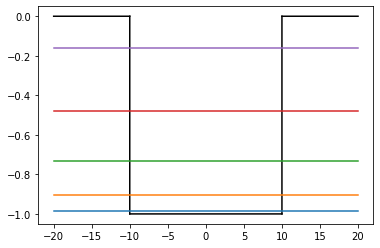

In [449]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)
for en in sol_t:
  zxc = [en for i in qwerty]
  plt.plot(qwerty, zxc)

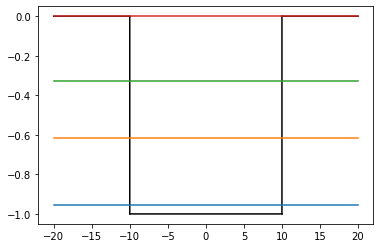

In [450]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)
for en in sol_ct:
  zxc = [en for i in qwerty]
  plt.plot(qwerty, zxc)

##Волновые функции

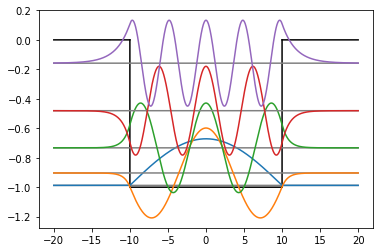

In [451]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)

for en in sol_t:
  k1 = math.sqrt(2 * m * abs(en) / (h**2))
  k2 = math.sqrt(2 * m * (en + U) / (h**2))

  B =( k1 / ((math.cos(k2 * a / 2)**2+ k1 * (math.sin(k2 * a) / (2 * k2) + a / 2))))**(1/2)
  A = B * math.cos(k2 * a / 2) * math.exp(k1 * a / 2)

  def func(x):
    if (x <= -a /2):
      return A * (math.exp(k1 * x)) + en
    if (-a / 2 < x < a / 2):
      return B * math.cos(k2 * x) + en
    if (x >= a / 2):
      return A * math.exp(-k1 * x) + en

  x = np.linspace(-a, a, 10000)
  wave_func = [func(i) for i in x]
  energy = [en for i in x]
  plt.plot(x, energy, color='gray')
  plt.plot(x, wave_func)

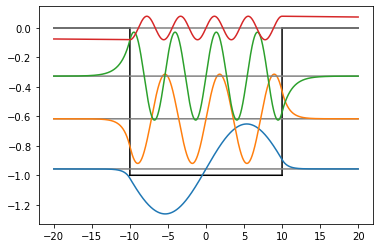

In [452]:
draw_pit()

qwerty = np.linspace(-a, a, 1000)
for en in sol_ct:
  k1 = math.sqrt(2 * m * abs(en) / (h**2))
  k2 = math.sqrt(2 * m * (en + U) / (h**2))

  B = (k1 / ((math.sin(k2 * a / 2)**2+ k1 * (-math.sin(k2 * a) / (2 * k2) + a / 2))))**(1/2)
  A = B * math.sin(k2 * a / 2) * math.exp(k1 * a / 2)

  def func(x):
    if (x < -a /2):
      return -A * (math.exp(k1 * x)) + en
    if (-a / 2 <= x <= a / 2):
      return B * math.sin(k2 * x) + en
    if (x > a / 2):
      return A * math.exp(-k1 * x) + en

  x = np.linspace(-a, a, 10000)
  wave_func = [func(i) for i in x]
  energy = [en for i in x]
  plt.plot(x, energy, color='gray')
  plt.plot(x, wave_func)